# Exploratory Data Analysis

In [1]:
print("######################################")
print("       Import Key Packages            ")
print("######################################")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

######################################
       Import Key Packages            
######################################


In [10]:
# read data

df_cars = pd.read_csv("https://gist.githubusercontent.com/omarish/5687264/raw/7e5c814ce6ef33e25d5259c1fe79463c190800d9/mpg.csv")

In [11]:
# view data

df_cars.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [12]:
# get dataset info

print("############################################")
print("          Info Of the Data Set")
print("############################################")
df_cars.info()

############################################
          Info Of the Data Set
############################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [13]:
# data cleaning

df_cars.horsepower = df_cars.horsepower.str.replace('?','NaN').astype(float)
df_cars.horsepower.fillna(df_cars.horsepower.mean(),inplace=True)
df_cars.horsepower = df_cars.horsepower.astype(int)
print("######################################################################")
print("          After Cleaning and type covertion in the Data Set")
print("######################################################################")
df_cars.info()

######################################################################
          After Cleaning and type covertion in the Data Set
######################################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int32  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 26.6+ KB


In [14]:
# more data cleaning

df_cars['name'] = df_cars['name'].str.replace('chevroelt|chevrolet|chevy','chevrolet')
df_cars['name'] = df_cars['name'].str.replace('maxda|mazda','mazda')
df_cars['name'] = df_cars['name'].str.replace('mercedes|mercedes-benz|mercedes benz','mercedes')
df_cars['name'] = df_cars['name'].str.replace('toyota|toyouta','toyota')
df_cars['name'] = df_cars['name'].str.replace('vokswagen|volkswagen|vw','volkswagen')
df_cars.groupby(['name']).sum().head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
amc ambassador brougham,13.0,8,360.0,175,3821,11.0,73,1
amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,1
amc ambassador sst,17.0,8,304.0,150,3672,11.5,72,1
amc concord,43.7,10,383.0,180,6213,37.3,158,2
amc concord d/l,18.1,6,258.0,120,3410,15.1,78,1


In [15]:
# summary stats

display(df_cars.describe().round(2))

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.46,2970.42,15.57,76.01,1.57
std,7.82,1.70,104.27,38.20,846.84,2.76,3.70,0.80
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00
25%,17.50,4.00,104.25,76.00,2223.75,13.82,73.00,1.00
50%,23.00,4.00,148.50,95.00,2803.50,15.50,76.00,1.00
75%,29.00,8.00,262.00,125.00,3608.00,17.17,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


In [16]:
# missing value handling

meanhp = df_cars['horsepower'].mean()
df_cars['horsepower'] = df_cars['horsepower'].fillna(meanhp)


In [17]:
# normality check

print("Skewness: %f" %df_cars['mpg'].skew())
print("Kurtosis: %f" %df_cars['mpg'].kurt())

Skewness: 0.457066
Kurtosis: -0.510781


In [18]:
# recode categorical variables

df_cars['origin'] = df_cars['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
df_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,america,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,america,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,america,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,america,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,america,ford torino


In [19]:
# create dummy variables

cData = pd.get_dummies(df_cars, columns=['origin'])
cData

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,ford torino,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,ford mustang gl,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,volkswagen pickup,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,dodge rampage,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,ford ranger,1,0,0


In [20]:
# remove columns

df_cars = df_cars.drop('name',axis=1)

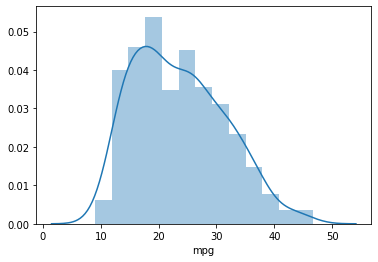

In [21]:
# histogram

sns_plot = sns.distplot(df_cars["mpg"])

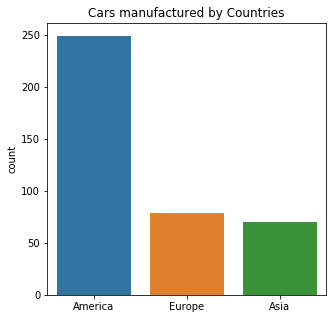

In [22]:
# bivariate chart

fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = df_cars.origin.values, data=df_cars)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'America'
labels[1] = 'Europe'
labels[2] = 'Asia'
ax.set_xticklabels(labels)
ax.set_title("Cars manufactured by Countries")
plt.show()

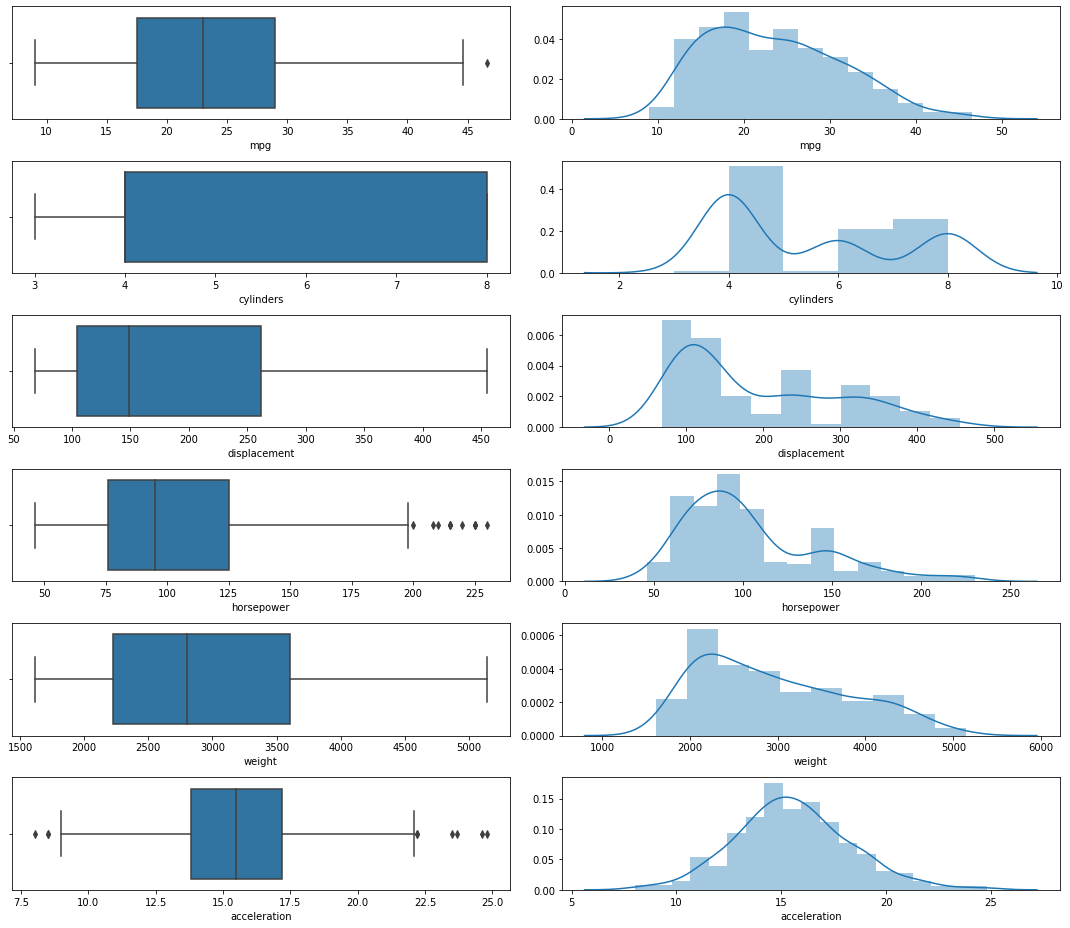

In [23]:
# exploring distribution

fig, ax = plt.subplots(6, 2, figsize = (15, 13))
sns.boxplot(x= df_cars["mpg"], ax = ax[0,0])
sns.distplot(df_cars['mpg'], ax = ax[0,1])
sns.boxplot(x= df_cars["cylinders"], ax = ax[1,0])
sns.distplot(df_cars['cylinders'], ax = ax[1,1])
sns.boxplot(x= df_cars["displacement"], ax = ax[2,0])
sns.distplot(df_cars['displacement'], ax = ax[2,1])
sns.boxplot(x= df_cars["horsepower"], ax = ax[3,0])
sns.distplot(df_cars['horsepower'], ax = ax[3,1])
sns.boxplot(x= df_cars["weight"], ax = ax[4,0])
sns.distplot(df_cars['weight'], ax = ax[4,1])
sns.boxplot(x= df_cars["acceleration"], ax = ax[5,0])
sns.distplot(df_cars['acceleration'], ax = ax[5,1])
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

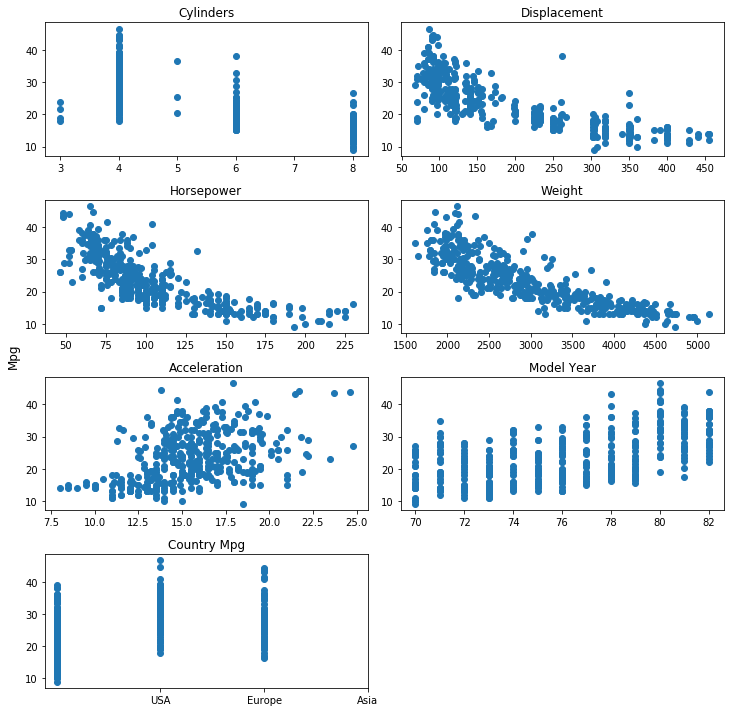

In [24]:
# scatter plot 

plt.figure(1)

f,axarr = plt.subplots(4,2, figsize=(10,10))
mpgval = df_cars.mpg.values
axarr[0,0].scatter(df_cars.cylinders.values, mpgval)
axarr[0,0].set_title('Cylinders')
axarr[0,1].scatter(df_cars.displacement.values, mpgval)
axarr[0,1].set_title('Displacement')
axarr[1,0].scatter(df_cars.horsepower.values, mpgval)
axarr[1,0].set_title('Horsepower')
axarr[1,1].scatter(df_cars.weight.values, mpgval)
axarr[1,1].set_title('Weight')
axarr[2,0].scatter(df_cars.acceleration.values, mpgval)
axarr[2,0].set_title('Acceleration')
axarr[2,1].scatter(df_cars["model_year"].values, mpgval)
axarr[2,1].set_title('Model Year')
axarr[3,0].scatter(df_cars.origin.values, mpgval)
axarr[3,0].set_title('Country Mpg')
# Rename x axis label as USA, Europe and Japan
axarr[3,0].set_xticks([1,2,3])
axarr[3,0].set_xticklabels(["USA","Europe","Asia"])
# Remove the blank plot from the subplots
axarr[3,1].axis("off")
f.text(-0.01, 0.5, 'Mpg', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

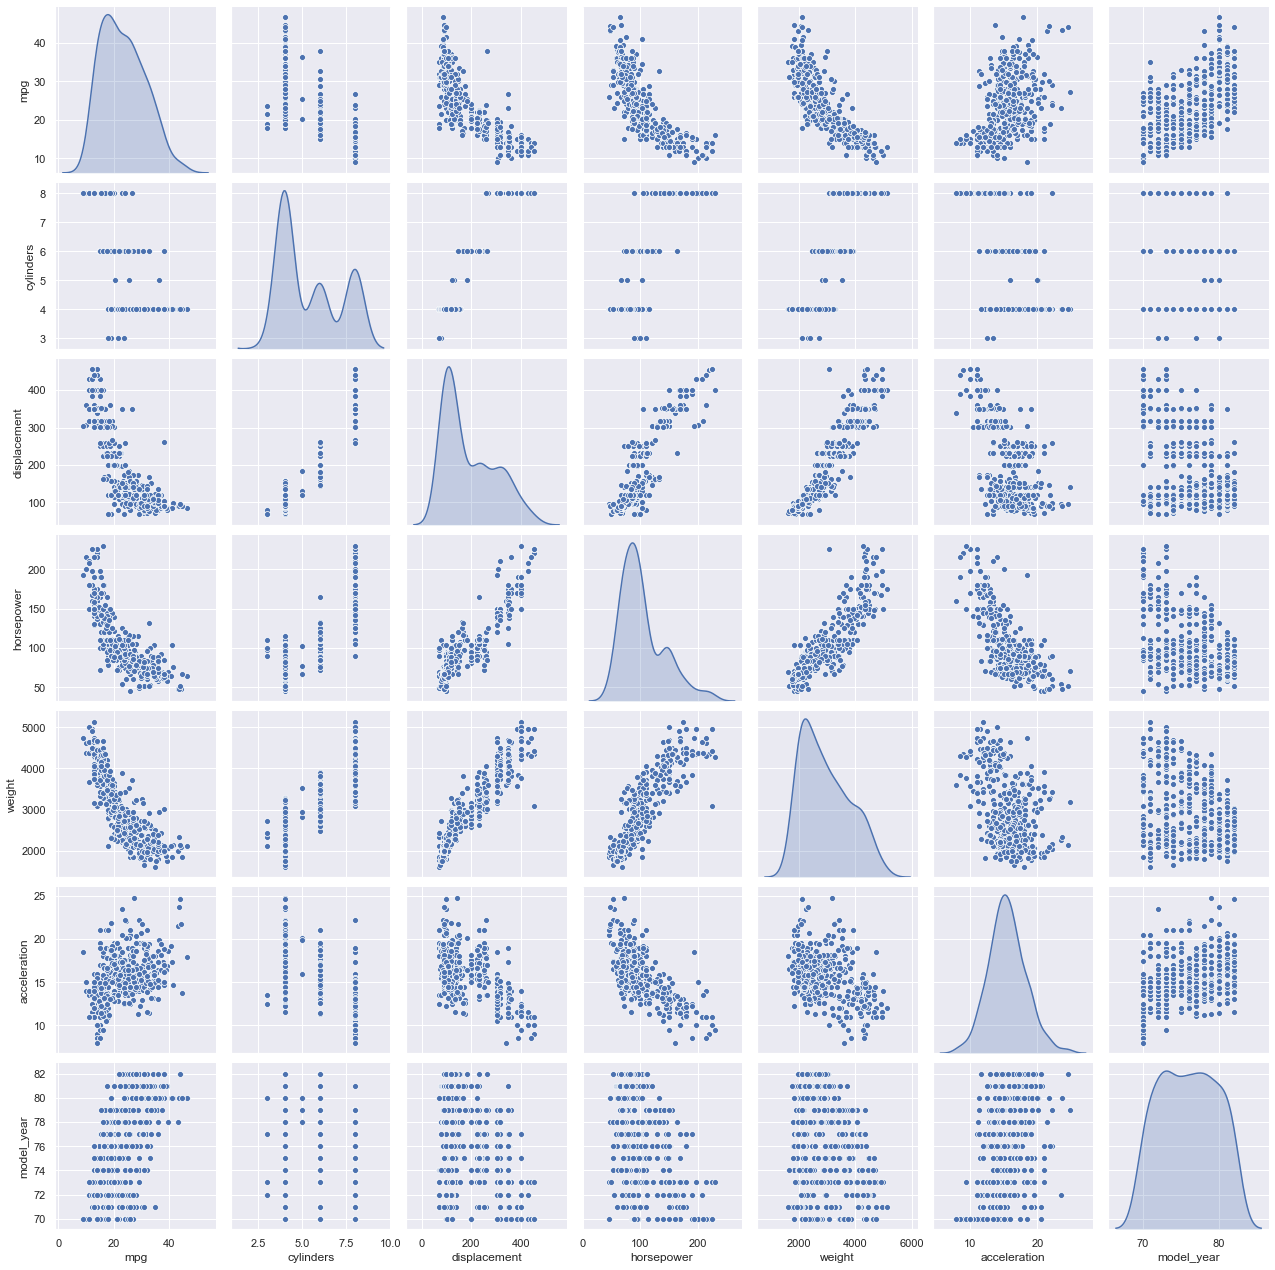

In [25]:
# multivariate charts

sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_cars.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   
# to plot density curve instead of the histogram on the diagram # Kernel density estimation(kde)

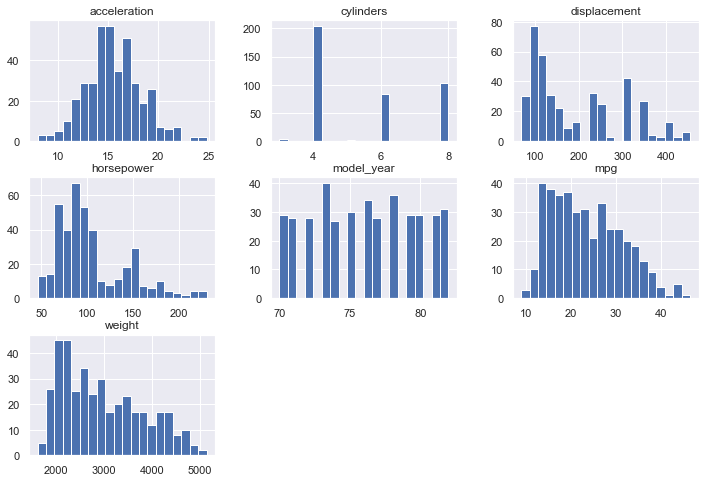

In [26]:
# more distributions

df_cars.hist(figsize=(12,8),bins=20)
plt.show()

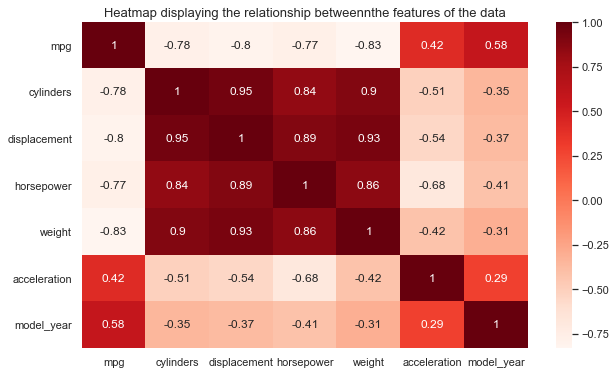

In [27]:
# heat map

plt.figure(figsize=(10,6))
sns.heatmap(df_cars.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()